In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [101]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [105]:
df.shape

(5572, 5)

In [106]:
df.columns.tolist()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [107]:
cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True, errors='ignore')

In [108]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [109]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
df.columns.tolist()

['target', 'text']

In [111]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(403)

In [116]:
df.drop_duplicates(keep='first',inplace=True)

In [117]:
df.shape

(5169, 2)

In [118]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [120]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


---

In [121]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [123]:
sns.set_style('darkgrid')

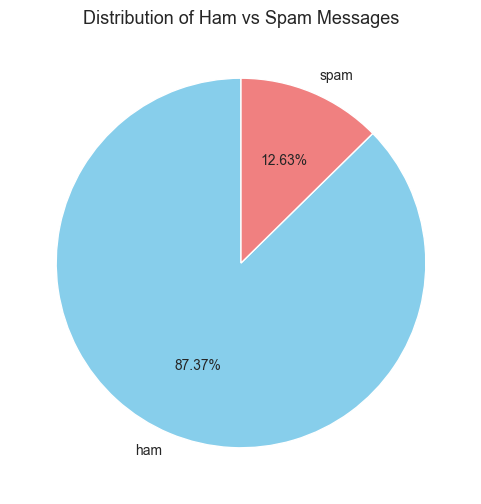

In [124]:
plt.figure(figsize=(6,6))
plt.pie(df['target'].value_counts(),
        labels=['ham', 'spam'],
        autopct='%0.2f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Ham vs Spam Messages", fontsize=13)
plt.show()

In [125]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['text'].apply(lambda x: x.count('.') + 1)

In [126]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [129]:
stats_summary = df[['target', 'num_characters', 'num_words', 'num_sentences']].groupby('target').describe()

display(stats_summary)


num_characters                                                    \
                count        mean        std   min    25%    50%    75%   
target                                                                    
0              4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0   
1               653.0  137.891271  30.137753  13.0  132.0  149.0  157.0   

              num_words             ...              num_sentences            \
          max     count       mean  ...   75%    max         count      mean   
target                              ...                                        
0       910.0    4516.0  14.134632  ...  18.0  171.0        4516.0  2.916519   
1       224.0     653.0  23.681470  ...  28.0   35.0         653.0  3.055130   

                                            
             std  min  25%  50%  75%   max  
target                                      
0       2.638732  1.0  1.0  2.0  4.0  42.0  
1       1.725848  1.0  2.0  3.0  4.0  14.0  

[2 rows x 24 columns]

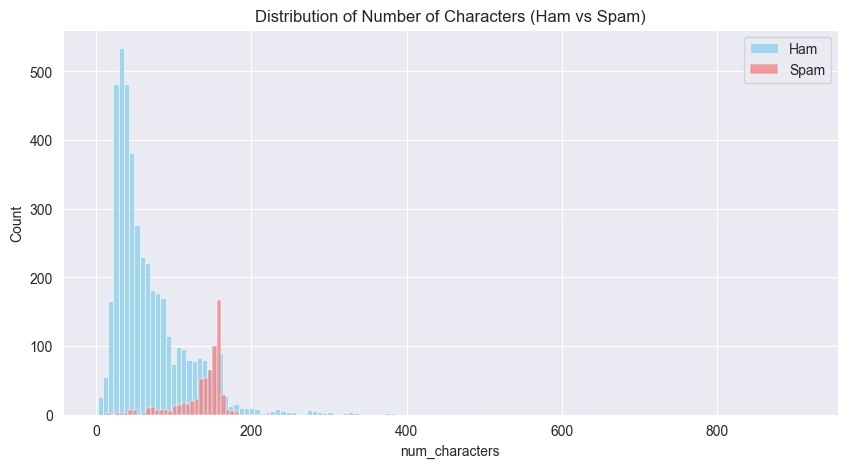

In [130]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham', color='skyblue', kde=False)
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam', color='lightcoral', kde=False)
plt.legend()
plt.title('Distribution of Number of Characters (Ham vs Spam)')
plt.show()

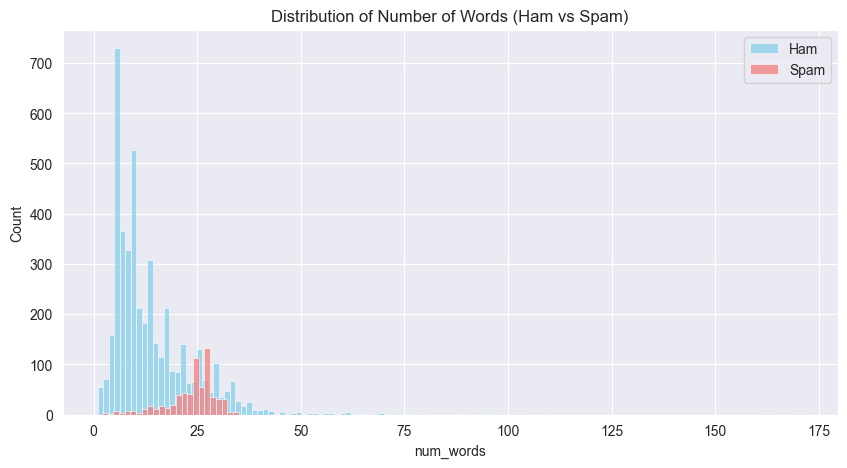

In [131]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham', color='skyblue', kde=False)
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam', color='lightcoral', kde=False)
plt.legend()
plt.title('Distribution of Number of Words (Ham vs Spam)')
plt.show()

In [132]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w.isalnum()]
    words = [w for w in words if w not in stop_words]
    words = [ps.stem(w) for w in words]
    return " ".join(words)

df['transformed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [134]:
df.drop(columns= 'text',inplace=True)

In [135]:
df.head()

,target,num_characters,num_words,num_sentences,transformed_text
0,0,111,20,9,go jurong point crazi avail bugi n great world...
1,0,29,6,7,ok lar joke wif u oni
2,1,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,11,7,u dun say earli hor u c alreadi say
4,0,61,13,1,nah think goe usf live around though


In [136]:
from wordcloud import WordCloud
from collections import Counter

spam_text = " ".join(df[df['target']==1]['transformed_text'].tolist())
ham_text = " ".join(df[df['target']==0]['transformed_text'].tolist())

In [141]:
wc = WordCloud(width=800, height=400, background_color='white', min_font_size=8)

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

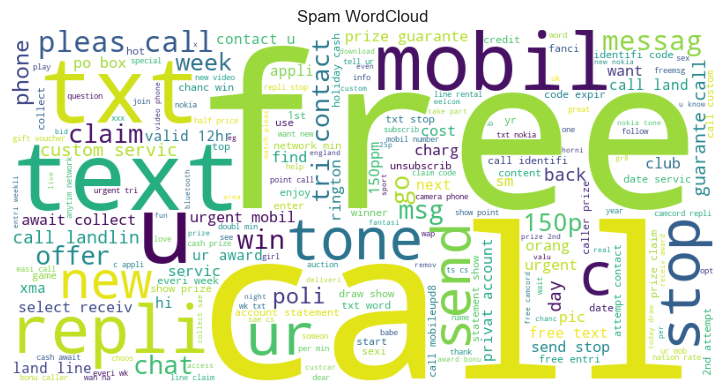

In [145]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Spam WordCloud')
plt.imshow(wc.generate(spam_text))
plt.axis('off')

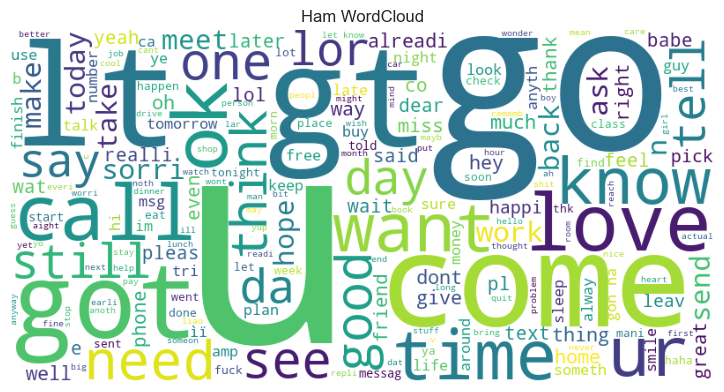

In [147]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title('Ham WordCloud')
plt.imshow(wc.generate(ham_text))
plt.axis('off')
plt.show()

In [148]:
top_spam = Counter(spam_text.split()).most_common(20)
top_ham = Counter(ham_text.split()).most_common(20)

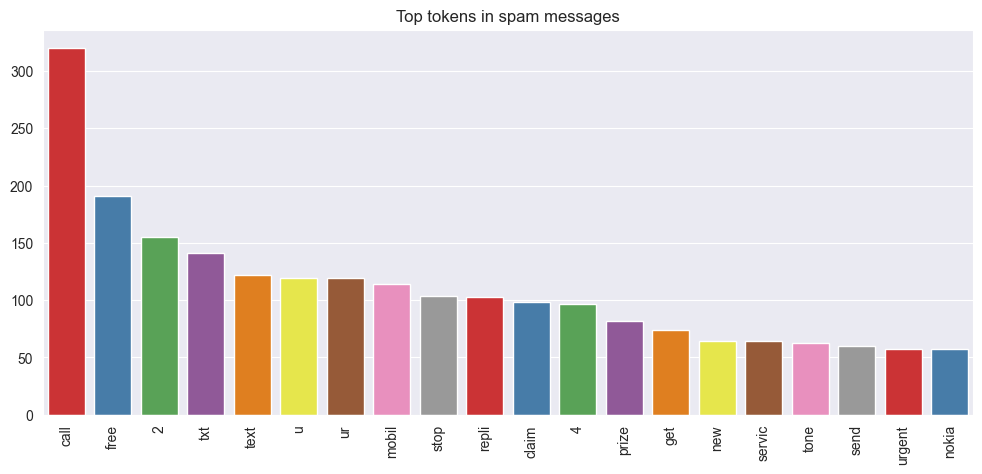

In [150]:
plt.figure(figsize=(12,5))
sns.barplot(x=[w for w,c in top_spam], y=[c for w,c in top_spam],palette='Set1')
plt.xticks(rotation=90)
plt.title('Top tokens in spam messages')
plt.show()

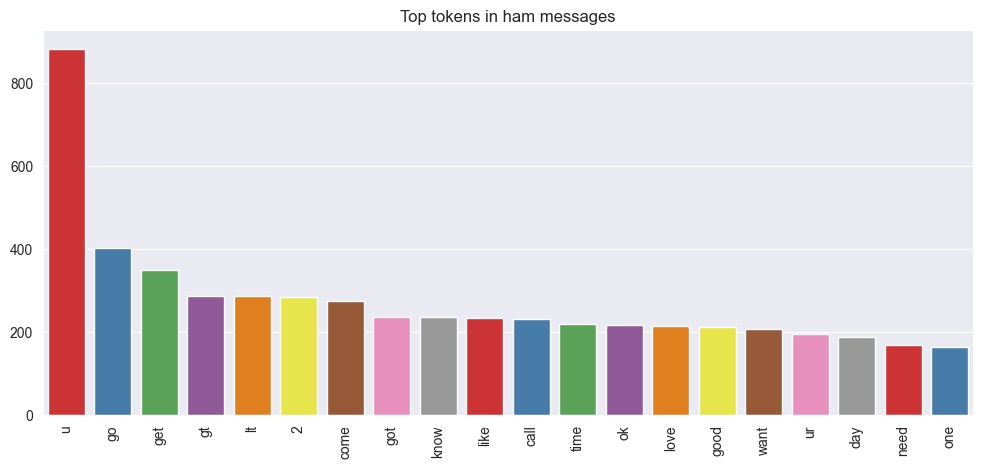

In [152]:
plt.figure(figsize=(12,5))
sns.barplot(x=[w for w,c in top_ham], y=[c for w,c in top_ham],palette='Set1')
plt.xticks(rotation=90)
plt.title('Top tokens in ham messages')
plt.show()

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=3000)

In [154]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [156]:
X_train.shape, X_test.shape

((4135, 3000), (1034, 3000))

In [157]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

MultinomialNB: Accuracy=0.9749, Precision=0.9817, Recall=0.8168, F1=0.8917


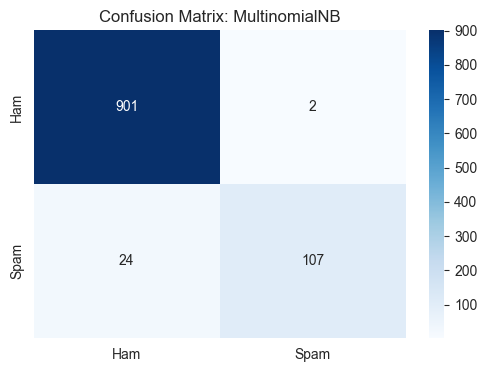

BernoulliNB: Accuracy=0.9836, Precision=0.9914, Recall=0.8779, F1=0.9312


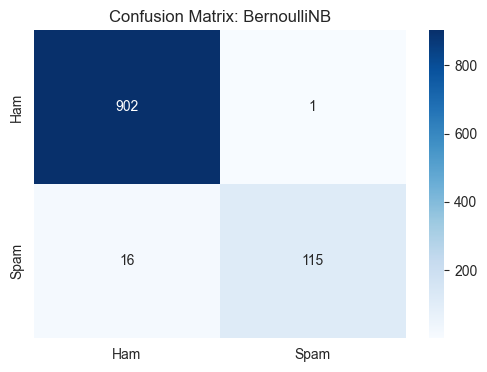

LogisticRegression: Accuracy=0.9565, Precision=1.0000, Recall=0.6565, F1=0.7926


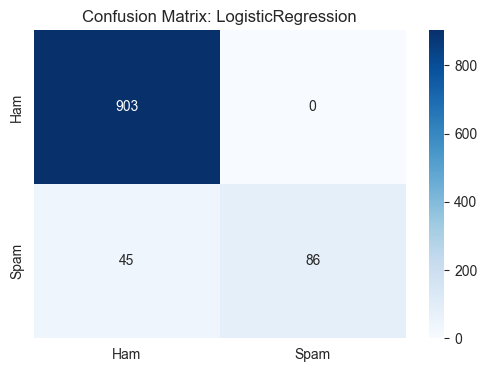

LinearSVC: Accuracy=0.9787, Precision=0.9739, Recall=0.8550, F1=0.9106


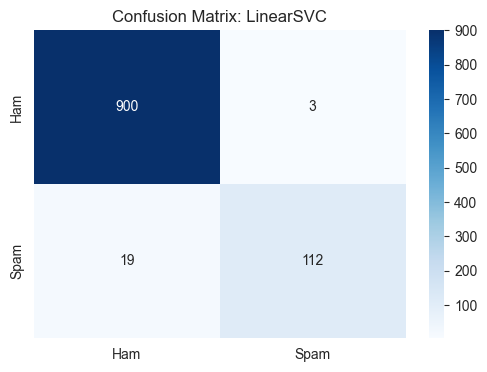

In [161]:
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'LinearSVC': LinearSVC(max_iter=2000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [162]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index':'model'})
results_melted = results_df.melt(id_vars='model', value_vars=['accuracy','precision','recall','f1'],
                                 var_name='metric', value_name='value')

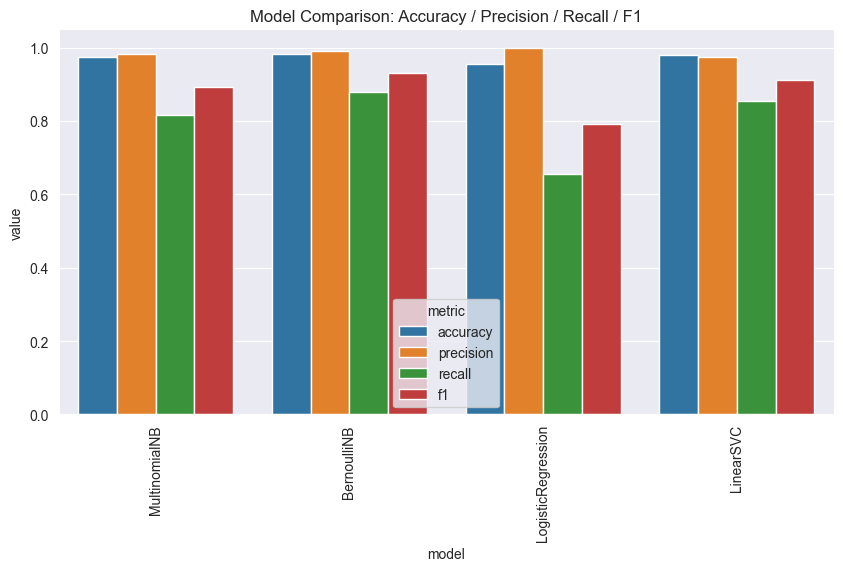

In [164]:
plt.figure(figsize=(10,5))
sns.barplot(data=results_melted, x='model', y='value', hue='metric')
plt.ylim(0,1.05)
plt.title('Model Comparison: Accuracy / Precision / Recall / F1')
plt.xticks(rotation=90)
plt.show()

In [165]:
results_df

,model,accuracy,precision,recall,f1
0,MultinomialNB,0.974855,0.981651,0.816794,0.891667
1,BernoulliNB,0.983559,0.991379,0.877863,0.931174
2,LogisticRegression,0.956480,1.000000,0.656489,0.792627
3,LinearSVC,0.978723,0.973913,0.854962,0.910569


In [166]:
import pickle
from sklearn.naive_bayes import BernoulliNB

final_model = BernoulliNB()
final_model.fit(X_train, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print('Done Pickle')

Done Pickle
